In [11]:
import pandas as pd
import numpy as np


np.random.seed(42)


study_hours_params = {'mean': 5.5, 'std': 1.5, 'min': 2, 'max': 10}
sleep_hours_params = {'mean': 7, 'std': 1.2, 'min': 4, 'max': 10}
stress_level_params = {'mean': 2.5, 'std': 1, 'min': 1, 'max': 5}
mood_level_params = {'mean': 3.5, 'std': 1, 'min': 1, 'max': 5}
screen_time_params = {'mean': 4, 'std': 1.5, 'min': 1, 'max': 8}


def label_burnout(row):
    if row['study_hours'] > 8 and row['sleep_hours'] < 6 and row['stress_level'] > 3 and row['mood_level'] < 3:
        return 'Burnout'
    elif row['study_hours'] > 6 and row['sleep_hours'] < 7 and row['stress_level'] > 2 and row['mood_level'] < 4:
        return 'At Risk'
    else:
        return 'Not Burnout'

data = {
    'study_hours': np.clip(np.random.normal(study_hours_params['mean'], study_hours_params['std'], 1000), study_hours_params['min'], study_hours_params['max']),
    'sleep_hours': np.clip(np.random.normal(sleep_hours_params['mean'], sleep_hours_params['std'], 1000), sleep_hours_params['min'], sleep_hours_params['max']),
    'stress_level': np.clip(np.random.normal(stress_level_params['mean'], stress_level_params['std'], 1000), stress_level_params['min'], stress_level_params['max']),
    'mood_level': np.clip(np.random.normal(mood_level_params['mean'], mood_level_params['std'], 1000), mood_level_params['min'], mood_level_params['max']),
    'screen_time': np.clip(np.random.normal(screen_time_params['mean'], screen_time_params['std'], 1000), screen_time_params['min'], screen_time_params['max'])
}

df = pd.DataFrame(data)

df['burnout_label'] = df.apply(label_burnout, axis=1)


df.to_csv('student_burnout_dataset.csv', index=False)

First 5 rows of the dataset:
   study_hours  sleep_hours  stress_level  mood_level  screen_time  \
0     6.245071     8.679227      1.824822    1.592192     2.704760   
1     5.292604     8.109560      2.355481    2.639615     3.953195   
2     6.471533     7.071556      1.707580    3.086394     4.027025   
3     7.784545     6.223676      2.192038    5.000000     4.708946   
4     5.148770     7.837868      1.000000    4.056553     1.949712   

  burnout_label  
0   Not Burnout  
1   Not Burnout  
2   Not Burnout  
3   Not Burnout  
4   Not Burnout  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    1000 non-null   float64
 1   sleep_hours    1000 non-null   float64
 2   stress_level   1000 non-null   float64
 3   mood_level     1000 non-null   float64
 4   screen_time    1000 non-null   float64
 5   burnout_l

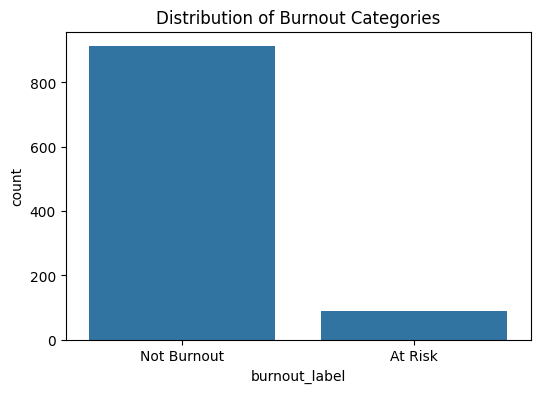


Burnout category percentages:
burnout_label
Not Burnout    91.2
At Risk         8.8
Name: proportion, dtype: float64


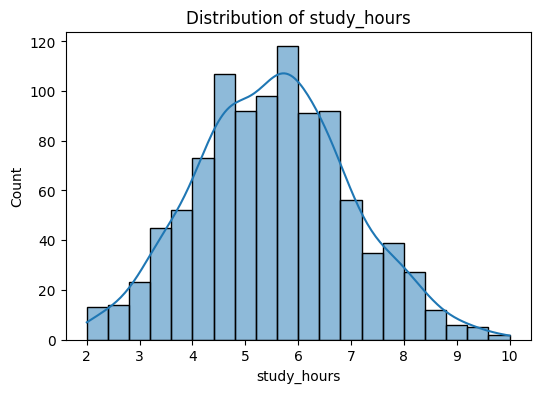

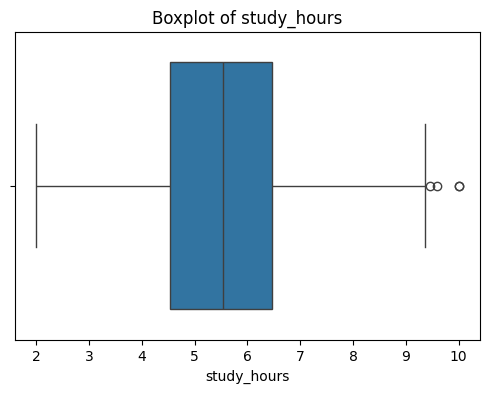

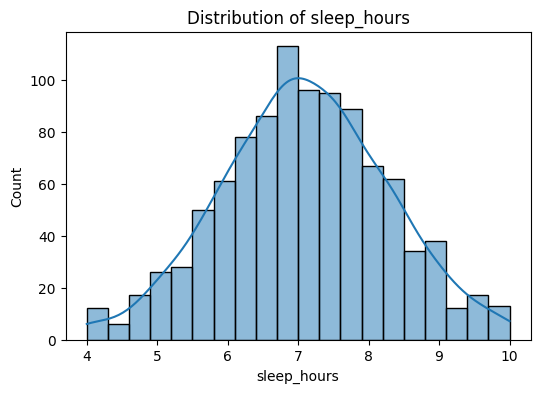

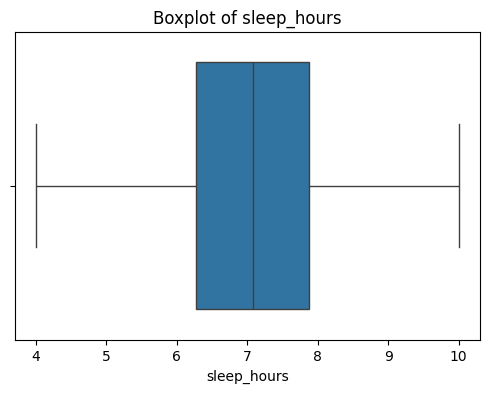

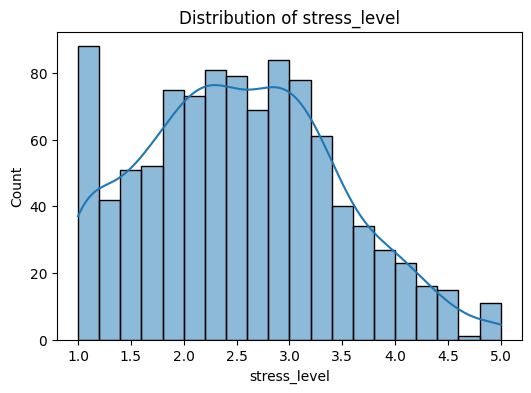

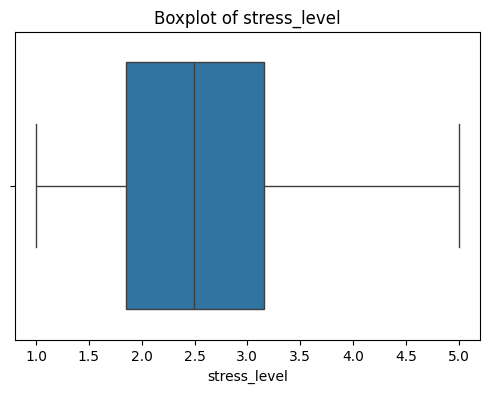

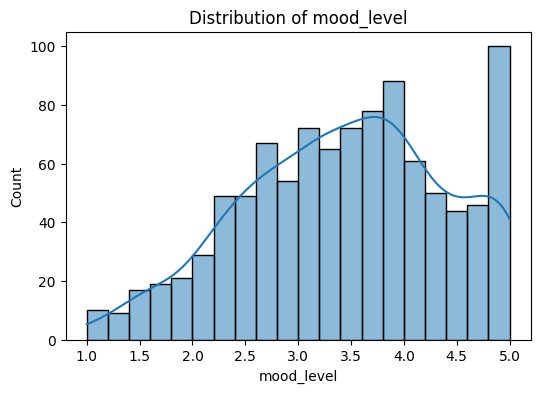

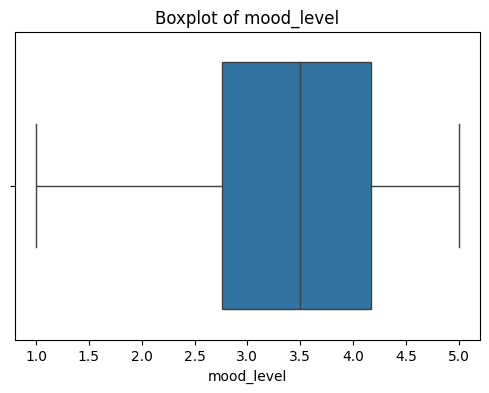

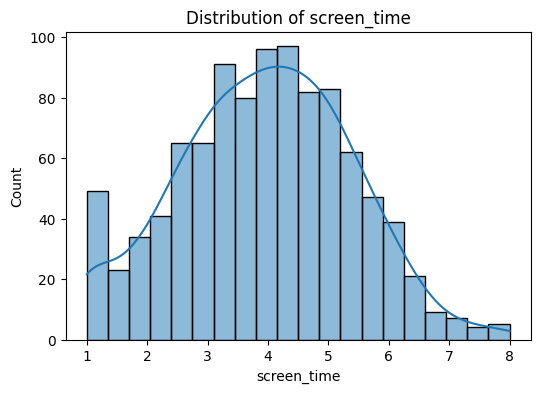

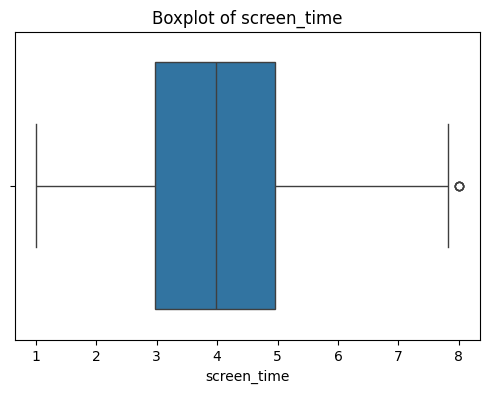

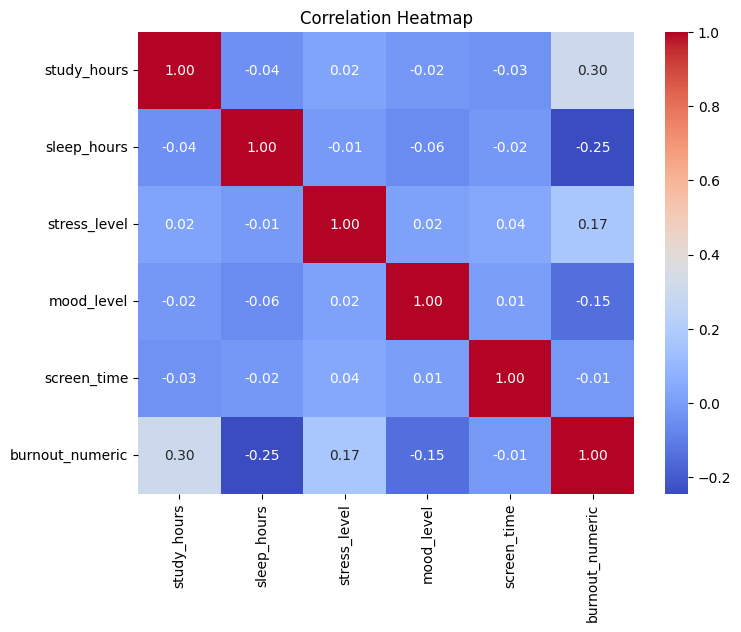

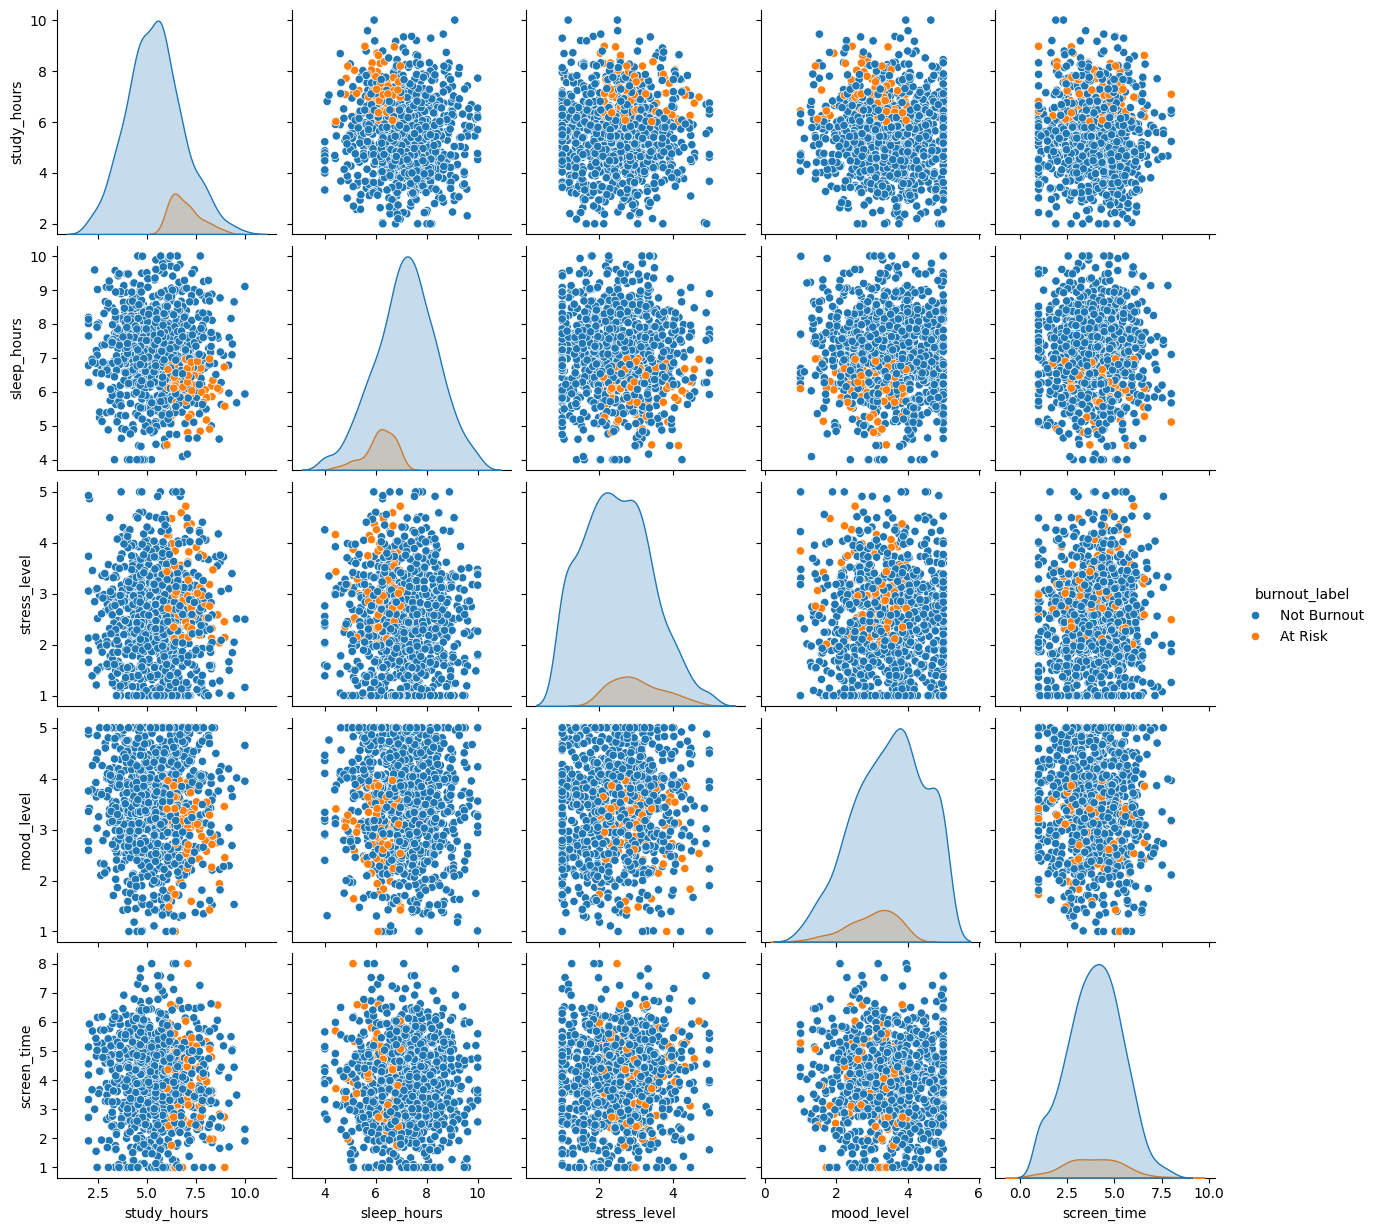

In [12]:
# Exploratory Data Analysis (EDA)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import joblib


df = pd.read_csv('/content/student_burnout_dataset.csv')

# Preview the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


print("\nMissing values in each column:")
print(df.isnull().sum())


if 'burnout_label' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='burnout_label', data=df)
    plt.title('Distribution of Burnout Categories')
    plt.show()

    print("\nBurnout category percentages:")
    print(df['burnout_label'].value_counts(normalize=True) * 100)
else:
    print("No column named 'burnout_label' found.")

numeric_features = ['study_hours', 'sleep_hours', 'stress_level', 'mood_level', 'screen_time']

for feature in numeric_features:
    if feature in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[feature], kde=True, bins=20)
        plt.title(f'Distribution of {feature}')
        plt.show()

        # Boxplot for outliers
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.show()
    else:
        print(f"Column {feature} not found in dataset.")


if 'burnout_label' in df.columns:
    # Convert burnout_label to numeric for correlation
    label_mapping = {'Not Burnout':0, 'At Risk':1, 'Burnout':2}
    df['burnout_numeric'] = df['burnout_label'].map(label_mapping)

    corr = df[numeric_features + ['burnout_numeric']].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Skipping correlation heatmap (burnout_label not found).")

available_features = [f for f in numeric_features if f in df.columns]
if 'burnout_label' in df.columns and len(available_features) > 0:
    sns.pairplot(df, hue='burnout_label', vars=available_features)
    plt.show()


In [13]:

label_mapping = {
    "Not Burnout": 0,
    "At Risk": 1
}
df["burnout_numeric"] = df["burnout_label"].map(label_mapping)

X = df[numeric_features]
y = df["burnout_numeric"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

best_accuracy = 0
best_model = None
best_model_name = ""


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print()

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

joblib.dump(best_model, "burnout_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.2f}")
print("Saved: burnout_model.pkl and scaler.pkl")

=== Logistic Regression ===
Accuracy: 0.905
Confusion Matrix:
 [[176   6]
 [ 13   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       182
           1       0.45      0.28      0.34        18

    accuracy                           0.91       200
   macro avg       0.69      0.62      0.65       200
weighted avg       0.89      0.91      0.89       200


=== Decision Tree ===
Accuracy: 0.995
Confusion Matrix:
 [[182   0]
 [  1  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       182
           1       1.00      0.94      0.97        18

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200


=== Random Forest ===
Accuracy: 0.995
Confusion Matrix:
 [[182   0]
 [  1  17]]
Classification Report:
               precision   

In [14]:
!pip install streamlit


In [15]:
!pip install requests


In [16]:
!pip install pyngrok



In [17]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import requests


st.set_page_config(
    page_title="AI Burnout Recovery Coach",
    page_icon="🧠",
    layout="wide"
)


model = joblib.load("burnout_model.pkl")
scaler = joblib.load("scaler.pkl")

st.markdown("""
<style>
.title {
    font-size: 42px;
    font-weight: 700;
}
.subtitle {
    font-size: 18px;
    color: #555;
    margin-bottom: 30px;
}
.card {
    background-color: #f9f9f9;
    padding: 25px;
    border-radius: 15px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.08);
}
.success-card {
    background-color: #e8f5e9;
}
.warning-card {
    background-color: #fff3e0;
}
.metric-box {
    background-color: #ffffff;
    padding: 15px;
    border-radius: 10px;
    text-align: center;
    font-size: 22px;
}
</style>
""", unsafe_allow_html=True)


st.markdown('<div class="title">AI Study Burnout Detection & Recovery Coach</div>', unsafe_allow_html=True)
st.markdown(
    '<div class="subtitle">Confidence-based burnout analysis with explainable AI & recovery planning</div>',
    unsafe_allow_html=True
)


st.sidebar.header("📊 Daily Study Metrics")

study_hours = st.sidebar.slider("📘 Study Hours", 0.0, 15.0, 5.0, step=0.01)
sleep_hours = st.sidebar.slider("😴 Sleep Hours", 0.0, 12.0, 7.0, step=0.01)
stress_level = st.sidebar.slider("😖 Stress Level (1–5)", 1.0, 5.0, 3.0, step=0.01)
mood_level = st.sidebar.slider("🙂 Mood Level (1–5)", 1.0, 5.0, 3.0, step=0.01)
screen_time = st.sidebar.slider("📱 Screen Time (hours)", 0.0, 12.0, 4.0, step=0.01)

analyze = st.sidebar.button("🚀 Analyze Burnout")


if analyze:
    X = np.array([[study_hours, sleep_hours, stress_level, mood_level, screen_time]])
    X_scaled = scaler.transform(X)

    prediction = model.predict(X_scaled)[0]
    prob = model.predict_proba(X_scaled)[0][1]

    risk_level = "Not Burnout" if prob < 0.4 else "At Risk"

    col1, col2 = st.columns(2)


    with col1:
        if prob < 0.4:
            st.markdown('<div class="card success-card">', unsafe_allow_html=True)
            st.subheader("✅ Burnout Risk Status")
        else:
            st.markdown('<div class="card warning-card">', unsafe_allow_html=True)
            st.subheader("⚠️ Burnout Risk Status")

        st.markdown(
            f'<div class="metric-box">Burnout Risk Score<br><b>{int(prob*100)}%</b></div>',
            unsafe_allow_html=True
        )

        st.write(f"**Status:** {risk_level}")

        reasons = []
        if sleep_hours < 6: reasons.append("low sleep")
        if study_hours > 7: reasons.append("high study load")
        if stress_level > 3: reasons.append("high stress")
        if mood_level < 3: reasons.append("low mood")
        if screen_time > 6: reasons.append("excessive screen time")

        explanation = (
            "Burnout risk is influenced mainly by: "
            + ", ".join(reasons)
            if reasons else
            "Your habits are currently well balanced."
        )

        st.info(explanation)
        st.markdown("</div>", unsafe_allow_html=True)

    st.subheader("📈 Burnout Risk Trend")

    if "history" not in st.session_state:
        st.session_state.history = []

    st.session_state.history.append(int(prob * 100))
    st.line_chart(st.session_state.history)

    st.subheader("🧘 Recovery Readiness Indicators")

    def status(val, good, bad):
        if val <= good:
            return "🟢 Good"
        elif val <= bad:
            return "🟡 Moderate"
        else:
            return "🔴 Needs Attention"

    st.metric("😴 Sleep", status(7 - sleep_hours, 1, 3))
    st.metric("😖 Stress", status(stress_level, 2, 4))
    st.metric("🙂 Mood", status(5 - mood_level, 1, 3))
    st.metric("📱 Screen", status(screen_time, 4, 7))

    st.subheader("🗓️ Today’s Action Plan")
    st.write("• 📚 Study: 2 focused sessions (25 min)")
    st.write("• ⏸ Breaks: 10-minute walk + hydration")
    st.write("• 😴 Sleep target: 7+ hours")
    st.write("• 📵 Screen cutoff: 30 min before bed")

    webhook_url = "https://hook.relay.app/api/v1/playbook/cmk46ydzq04ei0pm4cmweagct/trigger/rh1N6YEIzOuLz66MQRFLlQ"

    payload = {
        "study_hours": study_hours,
        "sleep_hours": sleep_hours,
        "stress_level": stress_level,
        "mood_level": mood_level,
        "screen_time": screen_time,
        "burnout_score": int(prob * 100),
        "risk_level": risk_level
    }

    response = requests.post(webhook_url, json=payload)

    with col2:
        st.markdown('<div class="card">', unsafe_allow_html=True)
        st.subheader("🤖 AI Recovery Coach")

        if response.status_code == 200:
          try:

            data = response.json()
            st.write(data.get("text", response.text if response.text else "No advice returned"))
          except Exception:

            st.write(response.text if response.text else "No advice returned")
        else:
          st.error("Failed to retrieve AI advice")


        st.markdown("</div>", unsafe_allow_html=True)


Overwriting app.py


In [ ]:


from pyngrok import ngrok
import os

NGROK_AUTH_TOKEN = "37tOX7qPRDfsNCq1czq9cXE093t_83TNiKyNbARWJhBCVF4ii"
!ngrok authtoken $NGROK_AUTH_TOKEN  # This ensures ngrok config is updated


ngrok.kill()


public_url = ngrok.connect(8501)
print("Streamlit public URL:", public_url)

!streamlit run app.py &

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit public URL: NgrokTunnel: "https://mithridatic-jumpily-charlene.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.191.210:8501

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
%%writefile requirements.txt
pandas==2.3.3
numpy==2.4.1
matplotlib==3.10.8
seaborn==0.13.2
scikit-learn==1.8.0
joblib==1.5.3
streamlit==1.52.2
requests==2.32.5
